**bold text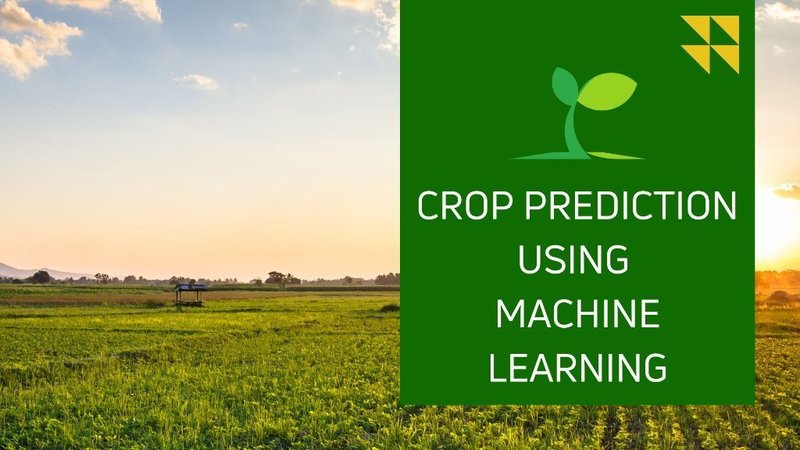**

# ***CROP PREDICTION***
**OBJECTIVE**:

*  The aim of this project is to develop a robust and accurate machine learning model that can predict the most suitable crop(s) to plant in a given geographical area based on a set of environmental and soil conditions.

  
* This prediction aims to assist farmers and agricultural stakeholders in making informed decisions to maximize yield, optimize resource use, and promote sustainable farming practices.

**STEPS INVOLVED:**

1.   Data Collection
2.   Preprocessing
3.   EDA
4.   Model Selection and Training
5.   Model Evaluation
6.   Hyperparameter Tuning
7.   Testing with outside values

**Potential Benefits:**

**Economic:** Increased crop yield and profitability for farmers by choosing the right crop for their land.

**Environmental:** Promotion of sustainable farming practices by optimizing resource use and minimizing environmental impact.

**Social:** Empowerment of farmers with data-driven insights, leading to better livelihoods and community well-being.
By achieving these objectiv

**Resource Management:**  Data-driven recommendations improve resource allocation by ensuring efficient use of fertilizers, water, and other inputs, leading to cost savings and reduced environmental impact.

# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/self/Crop_recommendation (2).csv")
df.shape

(8800, 8)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts


# **PREPROCESSING**

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000,8800.000000
mean,55.080909,51.444091,40.482727,26.774572,71.443720,6.609499,100.669506
std,37.059675,27.973451,38.555468,5.322922,22.761454,0.877838,56.017885
min,0.000000,4.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,25.000000,30.000000,20.000000,23.826868,58.192235,6.081469,60.745835
50%,42.000000,51.000000,29.000000,26.924435,79.960550,6.566980,90.402966
75%,89.000000,66.000000,46.000000,29.774256,89.417267,7.086870,122.704272
max,149.000000,150.000000,206.000000,46.732778,104.980970,10.233143,298.560117


In [ ]:
df[df['N'] == 0]

,N,P,K,temperature,humidity,ph,rainfall,label
346,0,65,15,23.461683,23.221976,5.645436,95.842534,kidneybeans
382,0,55,22,22.986669,20.579406,5.916779,143.858494,kidneybeans
477,0,70,21,36.300497,56.030213,4.672437,101.607399,pigeonpeas
517,0,55,25,28.174894,43.667230,4.524172,45.781728,mothbeans
608,0,49,18,29.683617,87.935981,6.990095,41.824902,mungbean
829,0,65,24,28.495844,62.446162,7.841496,53.145310,lentil
875,0,69,21,25.869282,61.883211,7.072923,36.682840,lentil
878,0,74,17,23.333759,64.505158,7.240988,47.015107,lentil
891,0,67,22,29.821121,69.407321,6.593798,51.564611,lentil
904,0,27,38,22.445813,89.901470,6.738016,109.390600,pomegranate


In [ ]:
#Removing rows where Nitrogen=0
df=df[df['N'] != 0]
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
8795,13,63,23,31.391055,51.453392,9.181497,42.440543,groundnuts
8796,31,55,17,29.923445,64.416451,8.898774,70.104721,groundnuts
8797,42,51,18,26.608803,50.689086,8.880159,63.918765,groundnuts
8798,11,55,18,27.688200,48.261590,6.013664,38.532547,groundnuts


In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            8775 non-null   int64  
 1   P            8775 non-null   int64  
 2   K            8775 non-null   int64  
 3   temperature  8775 non-null   float64
 4   humidity     8775 non-null   float64
 5   ph           8775 non-null   float64
 6   rainfall     8775 non-null   float64
 7   label        8775 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 548.6+ KB


In [ ]:
df.label.value_counts()

label
rice           400
chickpea       400
coffee         400
jute           400
cotton         400
papaya         400
blackgram      400
muskmelon      400
watermelon     400
banana         400
maize          400
grapes         399
groundnuts     399
mungbean       399
mothbeans      399
pigeonpeas     399
kidneybeans    398
pomegranate    397
mango          397
lentil         396
orange         396
coconut        396
Name: count, dtype: int64

In [ ]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
8770,13,63,23,31.391055,51.453392,9.181497,42.440543,7
8771,31,55,17,29.923445,64.416451,8.898774,70.104721,7
8772,42,51,18,26.608803,50.689086,8.880159,63.918765,7
8773,11,55,18,27.688200,48.261590,6.013664,38.532547,7


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
# Correlation
corr=df.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,label
N,1.000000,-0.153834,-0.014881,-0.008276,0.257469,0.051261,0.097371,-0.088987
P,-0.153834,1.000000,0.599498,-0.071875,-0.269339,-0.065474,-0.092887,-0.374309
K,-0.014881,0.599498,1.000000,-0.107274,0.094272,-0.091341,-0.078069,-0.157666
temperature,-0.008276,-0.071875,-0.107274,1.000000,0.226542,-0.004057,-0.042514,0.058969
humidity,0.257469,-0.269339,0.094272,0.226542,1.000000,0.017085,0.115973,0.293562
ph,0.051261,-0.065474,-0.091341,-0.004057,0.017085,1.000000,-0.103676,-0.077046
rainfall,0.097371,-0.092887,-0.078069,-0.042514,0.115973,-0.103676,1.000000,0.079734
label,-0.088987,-0.374309,-0.157666,0.058969,0.293562,-0.077046,0.079734,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

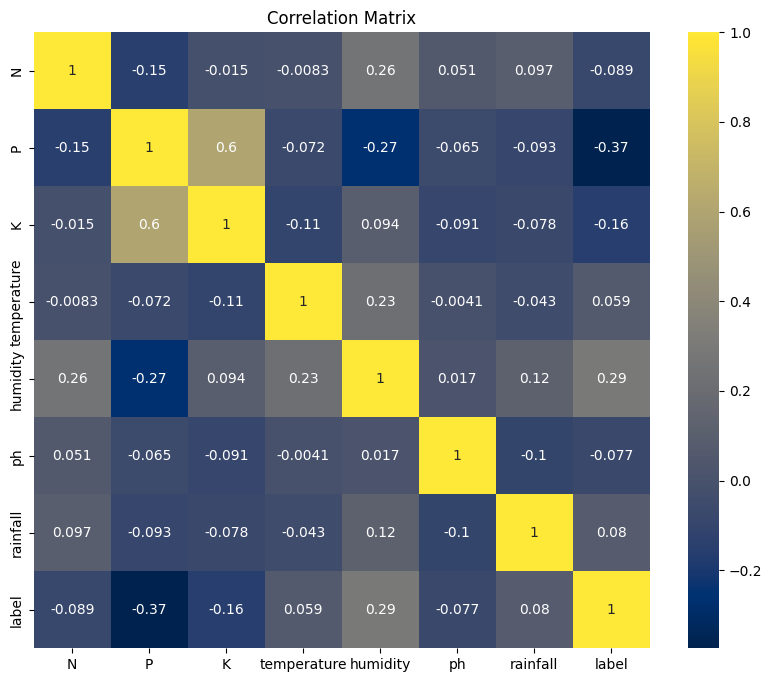

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='cividis', square=True)
plt.title('Correlation Matrix')


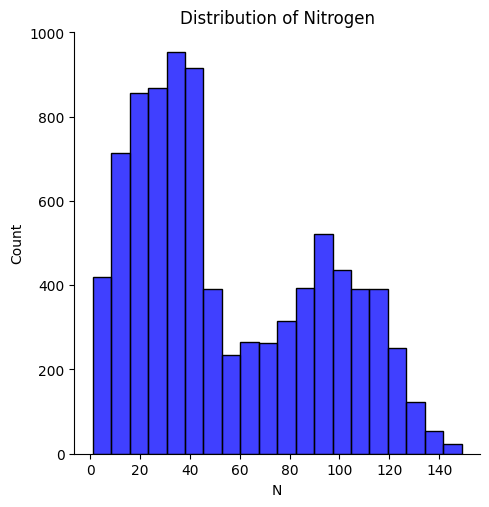

In [ ]:
sns.displot(df['N'],kde=False,bins=20,color='b')
plt.title('Distribution of Nitrogen')
plt.show()

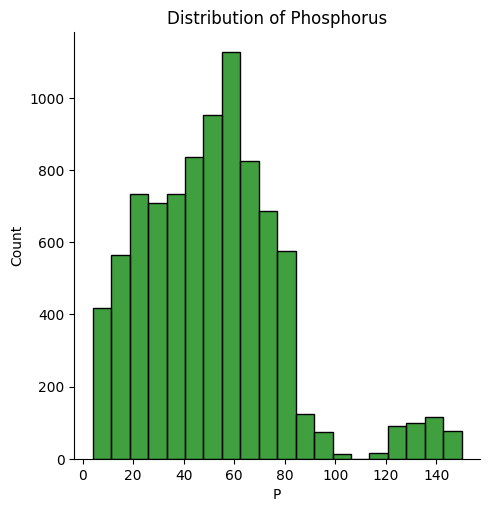

In [ ]:
sns.displot(df['P'],kde=False,bins=20,color='g')
plt.title('Distribution of Phosphorus')
plt.show()

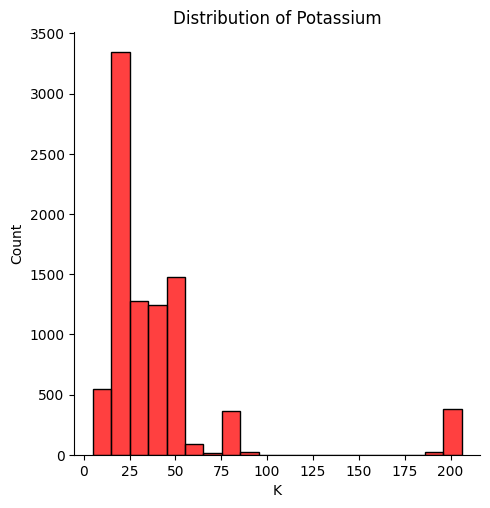

In [ ]:
sns.displot(df['K'],kde=False,bins=20,color='r')
plt.title('Distribution of Potassium')
plt.show()

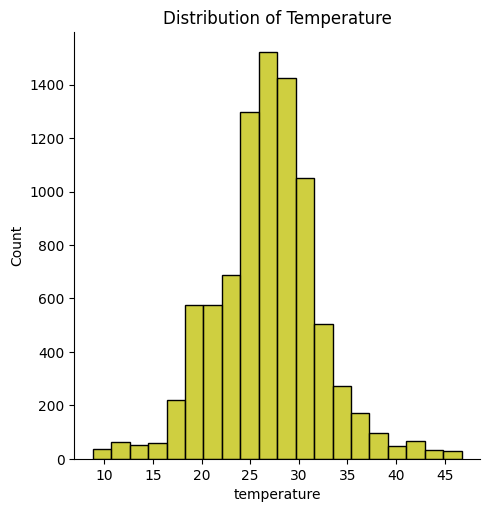

In [ ]:
sns.displot(df['temperature'],kde=False,bins=20,color='y')
plt.title('Distribution of Temperature')
plt.show()

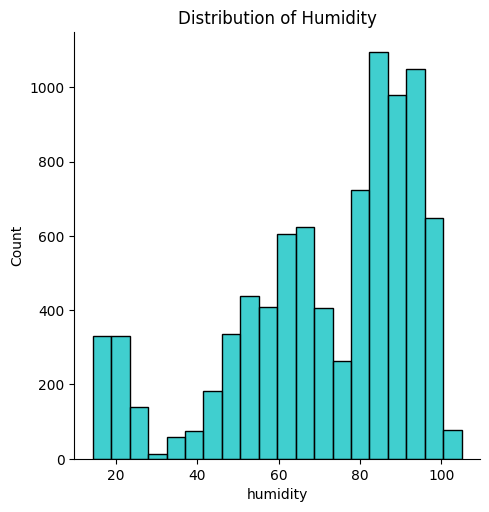

In [ ]:
sns.displot(df['humidity'],kde=False,bins=20,color='c')
plt.title('Distribution of Humidity')
plt.show()

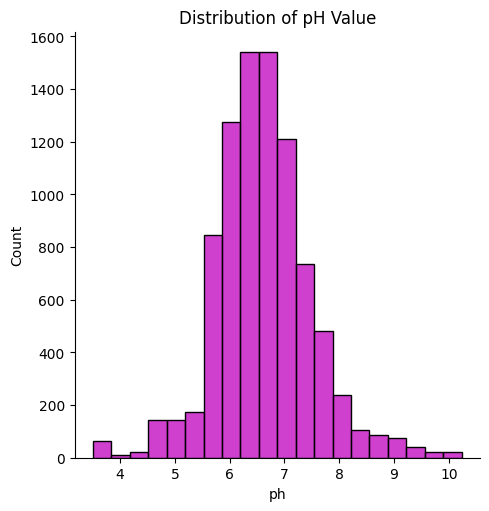

In [ ]:
sns.displot(df['ph'],kde=False,bins=20,color='m')
plt.title('Distribution of pH Value')
plt.show()

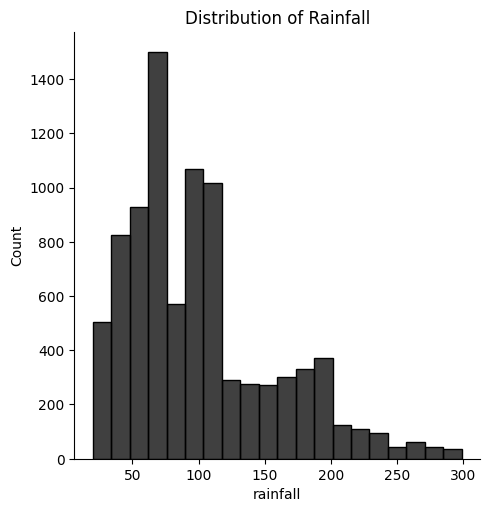

In [ ]:
sns.displot(df['rainfall'],kde=False,bins=20,color='k')
plt.title('Distribution of Rainfall')
plt.show()

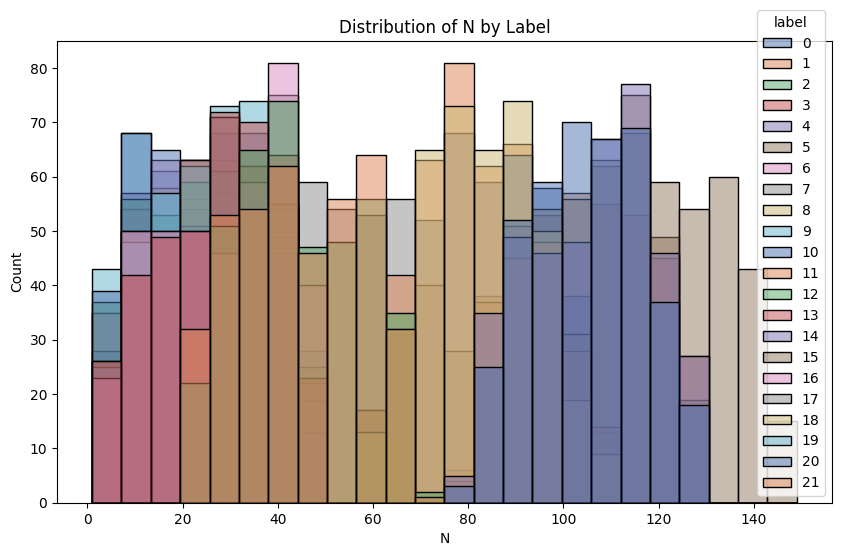

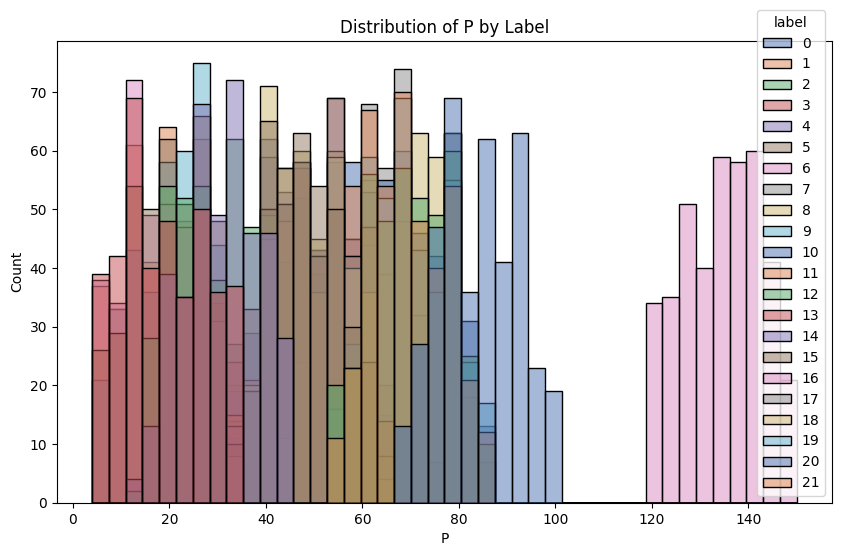

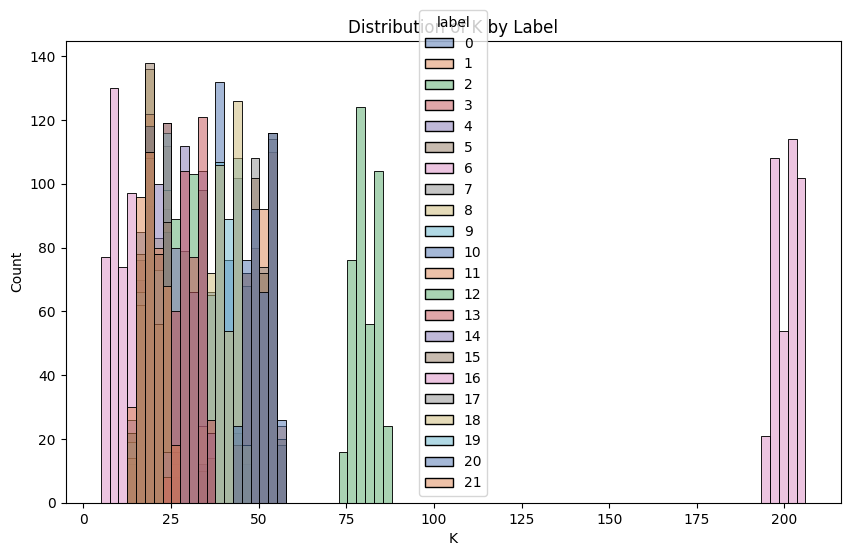

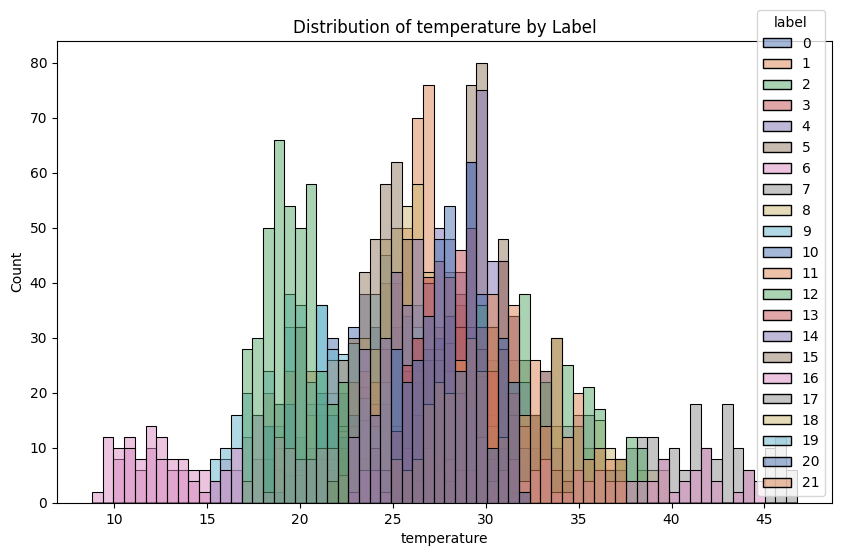

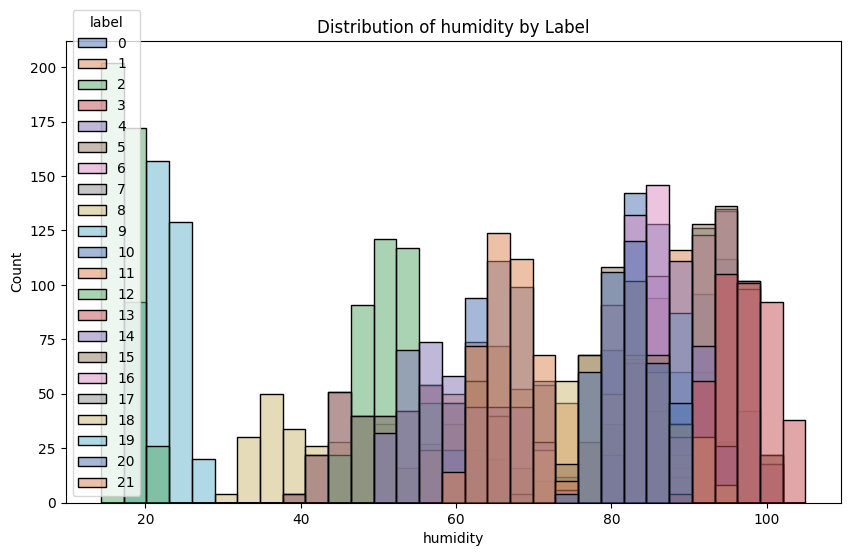

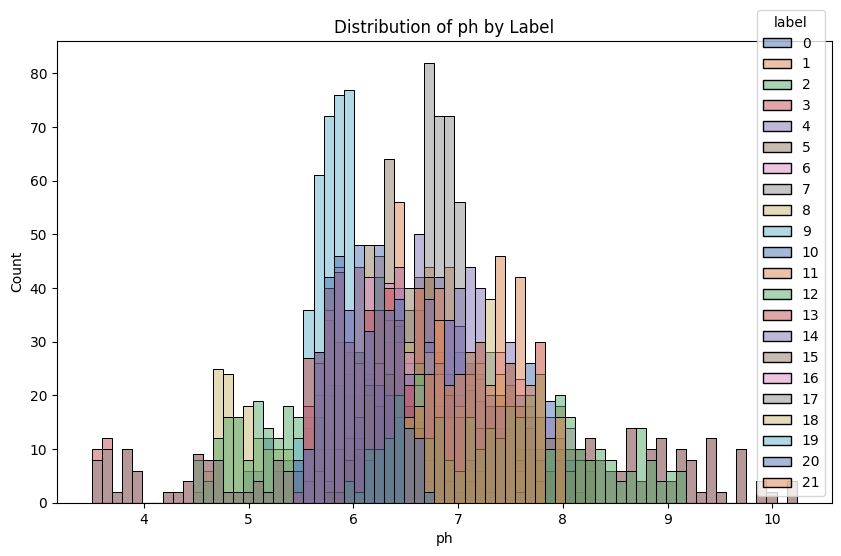

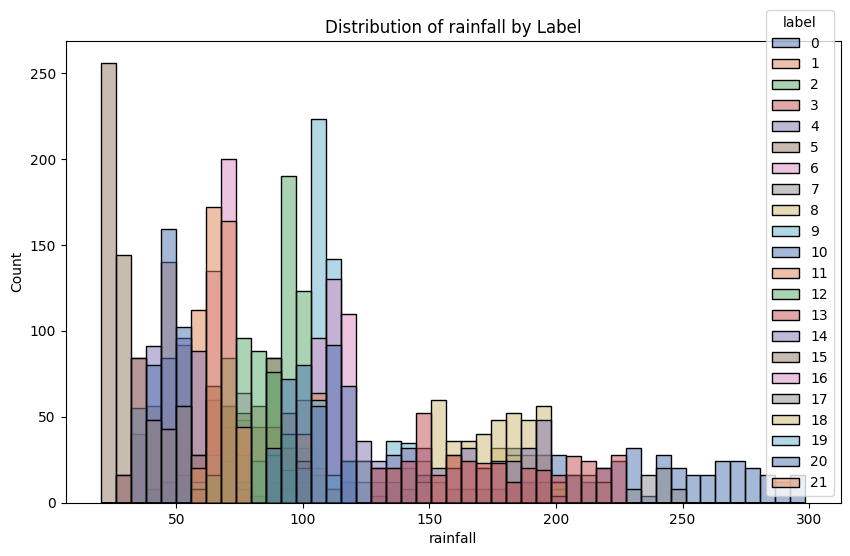

In [ ]:
for col in df.columns[:-1]:
    plt.figure(figsize=(10,6))
    sns.histplot(x=col,hue='label',data=df,palette='deep') # viridis
    plt.title(f'Distribution of {col} by Label')
    plt.show()

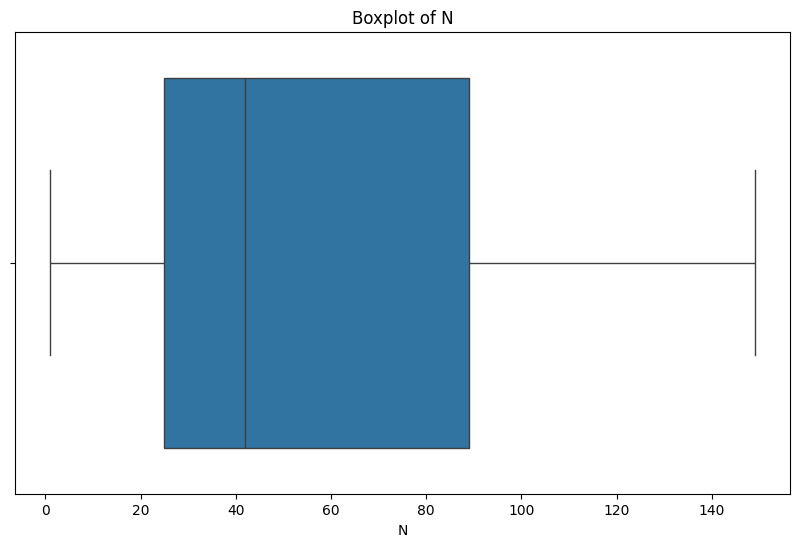

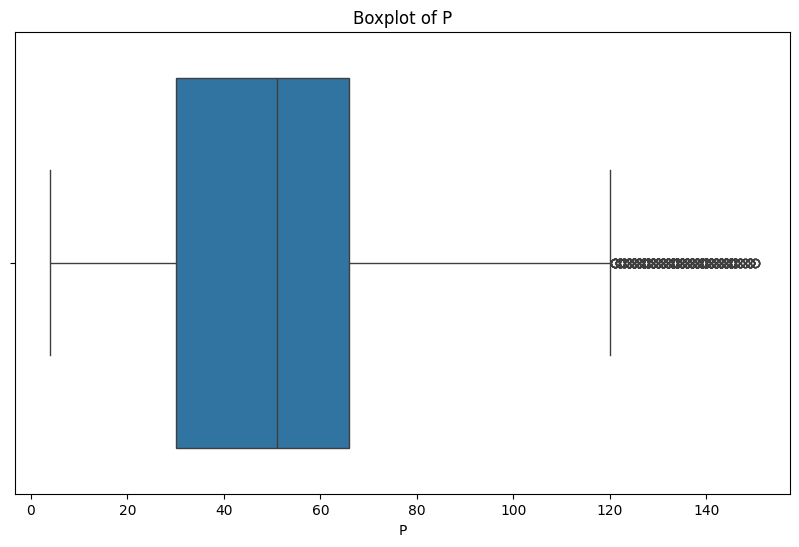

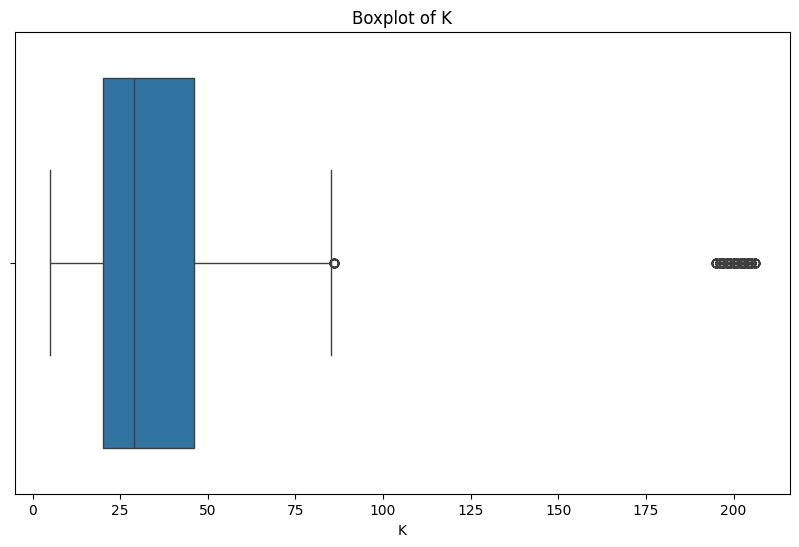

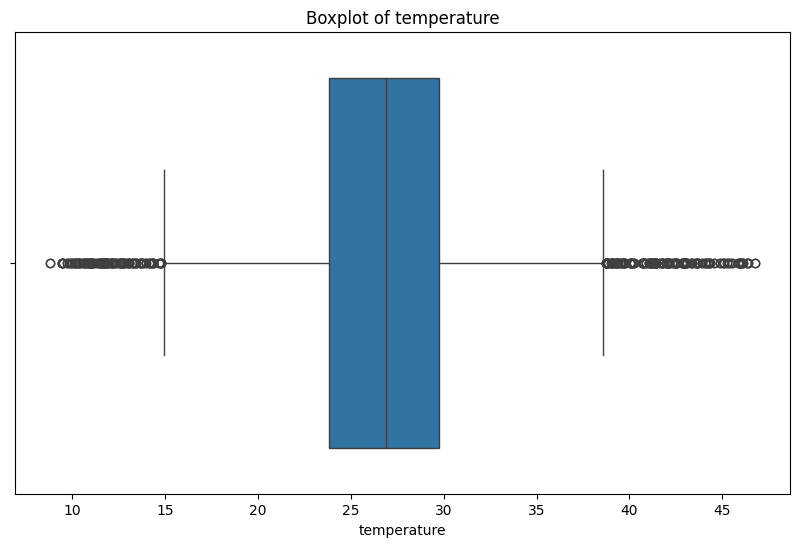

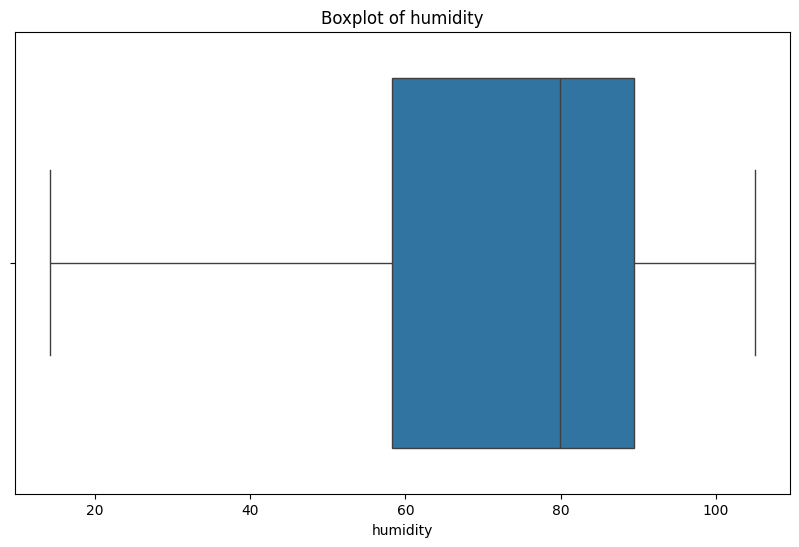

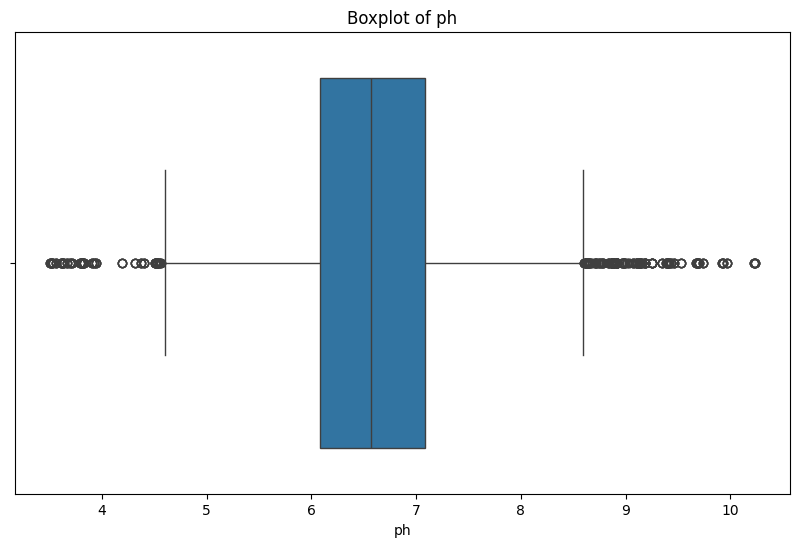

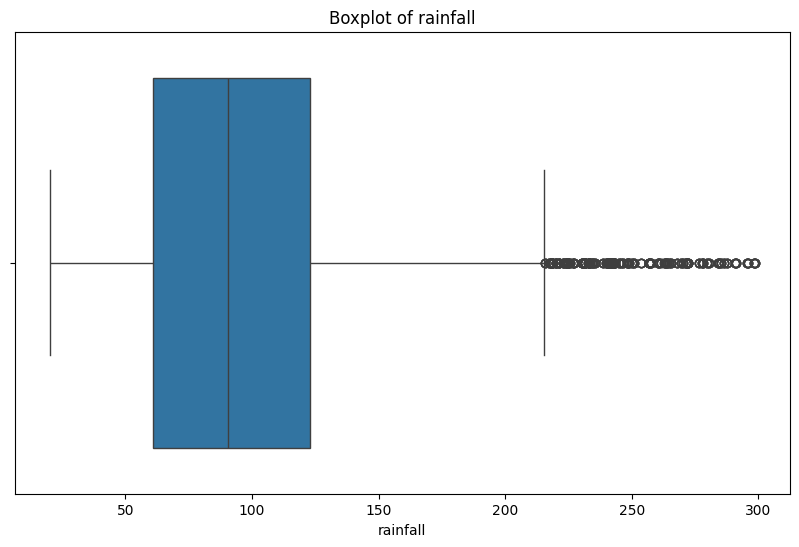

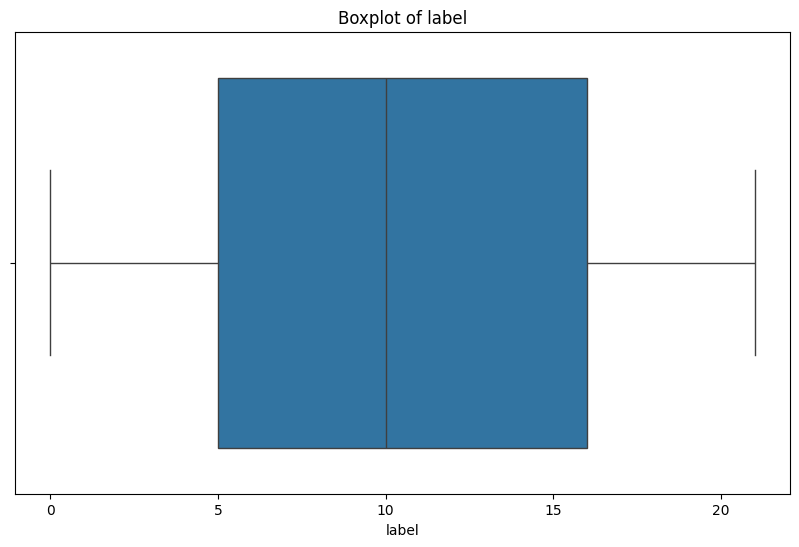

In [ ]:
for col in df.select_dtypes(include=['int64','float64']):
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# lst=['P','K','temperature','ph','rainfall']

# for i in lst:
#   if df[i].dtype in ['int64']:
#      Q1=df[i].quantile(0.25)
#      Q3=df[i].quantile(0.75)
#      IQR=Q3-Q1
#      lower_bound=Q1-1.5*IQR
#      upper_bound=Q3+1.5*IQR

#      df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

In [ ]:
# grapes_count=df[df['label']=='grapes'].shape[0]
# grapes_count

In [ ]:
#separating feature and target column
x=df.drop(columns='label')
y=df.label

# **SPLITTING INTO TRAINING AND TESTING**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#scaling using standard scaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
x_train

array([[-1.24827569, -0.79846567, -0.06595293, ...,  0.87881688,
        -0.79364493,  0.20059465],
       [-1.32914902, -0.54902922, -0.47905981, ..., -0.52715278,
         2.55601584, -1.04123387],
       [ 1.097051  , -1.26170478,  0.1664197 , ...,  1.0120744 ,
        -0.33337314, -1.29739682],
       ...,
       [-0.70912013,  0.55561791, -0.63397489, ..., -0.76862377,
        -2.03729192,  1.42838611],
       [ 1.582291  ,  1.2326597 ,  0.21805806, ...,  0.42101701,
        -0.26710805, -0.02203046],
       [-1.32914902, -0.22832521, -0.63397489, ..., -0.27407743,
        -3.42308515, -0.65785769]])

In [ ]:
x_test

array([[-0.65520457,  0.98322325,  0.88935674, ..., -2.4559793 ,
         1.80042515, -0.19548432],
       [ 1.04313544,  1.41082859,  0.26969642, ...,  0.21826235,
        -1.14018505,  0.15798033],
       [-1.00565568,  0.98322325, -0.60815571, ..., -0.07981945,
         0.01453175, -0.9630868 ],
       ...,
       [-1.16740235, -0.62029677,  0.08896216, ...,  0.94158452,
        -1.18565515,  0.07264112],
       [-0.41258457,  1.12575837, -0.37578309, ..., -2.13284432,
        -0.61612514, -0.66480125],
       [-0.38562679,  0.4130828 ,  0.34715396, ...,  1.05507067,
         0.1997847 ,  1.91704084]])

# **MODEL BUILDING**

In [ ]:
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
random_forest=RandomForestClassifier()
gr_boost=GradientBoostingClassifier()
ada=AdaBoostClassifier()
svc=SVC()



models=[knn,dt,random_forest,gr_boost,ada,svc]
evaluation={'name':[],'accuracy':[]}

for model in models:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  evaluation['name'].append(model)
  evaluation['accuracy'].append(accuracy)
  print(model,'\n')
  print(f"Accurcy score of {model} is :",accuracy_score(y_test,y_pred))
  print('===================================================================','\n')
  print(classification_report(y_test,y_pred))
  print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!','\n')



best_model_name=evaluation['name'][np.argmax(evaluation['accuracy'])]
print('\n')
best_model_accuracy=evaluation['accuracy'][np.argmax(evaluation['accuracy'])]
print('\n')
print(f"Model with highest accuracy:{best_model_name} with an accuracy score of {best_model_accuracy} ")

KNeighborsClassifier() 

Accurcy score of KNeighborsClassifier() is : 0.9190883190883191

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       0.97      0.98      0.98        66
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        69
           4       0.99      1.00      0.99        88
           5       0.96      1.00      0.98        69
           6       1.00      1.00      1.00        76
           7       0.28      0.27      0.27        85
           8       0.92      0.96      0.94        89
           9       0.96      1.00      0.98        90
          10       0.96      0.99      0.98        82
          11       1.00      0.96      0.98        73
          12       1.00      1.00      1.00        97
          13       0.20      0.20      0.20        75
          14       1.00      1.00      1.00        84
          15       1.00      1.00      1.00  

# **MODEL FINALIZED WITH SVC**

In [ ]:
finalmodel=SVC()
finalmodel.fit(x_train,y_train)
y_pred=finalmodel.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy:{accuracy}")
print(classification_report(y_test,y_pred))

Accuracy:0.9367521367521368
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        86
           1       1.00      0.97      0.98        66
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        88
           5       0.97      1.00      0.99        69
           6       1.00      1.00      1.00        76
           7       0.43      0.31      0.36        85
           8       0.90      0.99      0.94        89
           9       1.00      1.00      1.00        90
          10       0.91      0.99      0.95        82
          11       1.00      0.97      0.99        73
          12       1.00      1.00      1.00        97
          13       0.41      0.52      0.46        75
          14       1.00      1.00      1.00        84
          15       1.00      1.00      1.00        88
          16       1.00      1.00      1.00        78

# **HYPERPARAMETER TUNING**

In [ ]:
param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],'kernel':['rbf','linear']}
grid_search=GridSearchCV(SVC(),param_grid,cv=5)
grid_search.fit(x_train, y_train)
best_model=grid_search.best_estimator_

y_pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model:{accuracy}")


Accuracy of the best model:0.9390313390313391


# **PREDICTION WITH OUTSIDE VALUE**

In [ ]:
def predict_crop(N, P, K,temperature,humidity,ph,rainfall):

  input_data=[N,P,K,temperature,humidity,ph,rainfall]
  input_data_scaled=ss.transform([input_data])
  predicted_crop=finalmodel.predict(input_data_scaled)[0]

  return predicted_crop


In [ ]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

array(['banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton',
       'grapes', 'groundnuts', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
predict_crop(8,3,73,91,41,9,6)

13

In [ ]:
predict_crop(78,42,42,20,81,7,262)


20

In [ ]:
predict_crop(10,50,110,25,60,5,150)

18

In [ ]:
le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

array(['banana', 'blackgram', 'chickpea', 'coconut', 'coffee', 'cotton',
       'grapes', 'groundnuts', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [ ]:
# neededfiles={'model':svc,'ss':ss,"LabelEncoder":le}
# import  pickle
# filecrop=open('filecrop.pkl','wb')
# #pickle.dump(file=file,obj=needed_files)
# pickle.dump(neededfiles,filecrop)
# neededfiles

In [ ]:
# file1=open('filecrop.pkl','rb')
# res=pickle.load(file1)
# res['model']
# res['ss']
# res['LabelEncoder']

# **CONCLUSION**

By harnessing the insights provided by comprehensive datasets encompassing soil composition and environmental variables, farmers and agricultural experts can make informed decisions that optimize crop productivity, enhance resource management practices, promote sustainability, bolster climate resilience, and ultimately improve profitability in the agricultural sector.

Data-driven decision-making is the cornerstone of effective crop recommendation strategies, paving the way for a more efficient, resilient, and sustainable agricultural future.

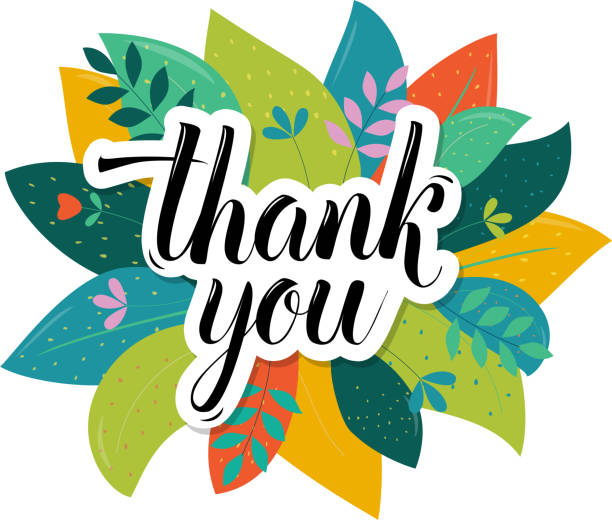